In [ ]:
!pip install gdown

reading train.json...
Balance
cuisine
brazilian        467
british          804
cajun_creole    1546
chinese         2673
filipino         755
french          2646
greek           1175
indian          3003
irish            667
italian         7838
jamaican         526
japanese        1423
korean           830
mexican         6438
moroccan         821
russian          489
southern_us     4320
spanish          989
thai            1539
vietnamese       825
Name: cuisine, dtype: int64
Accuracy: 0.7888120678818353
Precision: 0.7859605827675145


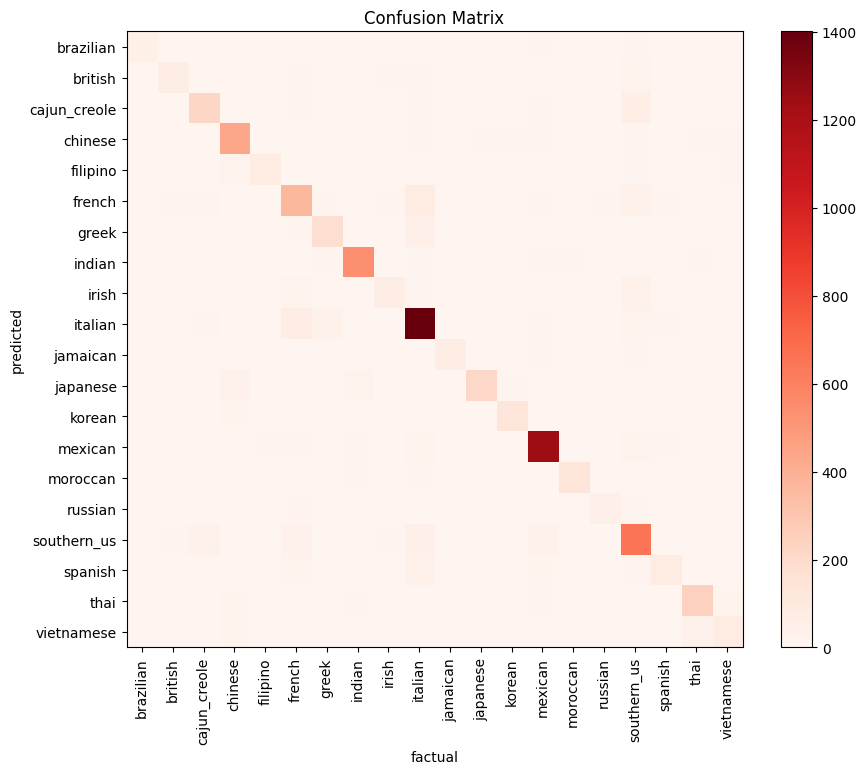

fhnish


In [111]:
import os
import gdown
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

name_url = "https://drive.google.com/file/d/11eMml3EspPZezXjYOari6kJWKumBhWtX/view?usp=drive_link"
name_archive = "archive.zip"
name_test = "test.json"
name_train = "train.json"

if not os.path.exists(name_archive):
  print("downloading from google disk...")
  gdown.download(name_url, name_archive, quiet=False,fuzzy=True)

if not os.path.exists(name_test) or not os.path.exists(name_train):
  print("unzip archive...")
  with zipfile.ZipFile(name_archive, 'r') as zip_ref:
    zip_ref.extractall()

#print("reading {0}...".format(name_test))
#df_test = pd.read_json(name_test)
#print(df_test.columns)
#print(df_test.head(20))

print("reading {0}...".format(name_train))
df_train = pd.read_json(name_train)
#print(df_train.columns)
#print(df_train.head(20))

x = df_train['ingredients']
y = df_train['cuisine']

print("Balance")
print(df_train.groupby(['cuisine'])['cuisine'].count())

#как то можно одной строкой
for i in range(x.count()):
  _list = x.iat[i]
  x.iat[i] = " ".join(_list).lower()
#print(x)

#x_train = df_train['ingredients']
#y_train = df_train['cuisine']
#x_test = df_test['ingredients']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

pipeline = Pipeline([
  ('tfidvectorizer',TfidfVectorizer()),
  ('LinearSVC',LinearSVC())
])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: {0}".format(accuracy))
print("Precision: {0}".format(precision))
#print("Confusion Matrix")
#print(cm)
#print(pipeline.classes_)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
classes = pipeline.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('factual')
plt.ylabel('predicted')
plt.xticks(rotation=90)
plt.show()

print("fhnish")